In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
import plotly.graph_objs as go
from wordcloud import WordCloud
import geopandas as gpd

# Zomato Chennai Listings as of May 27th 2020
---
This dataset was created by scraping their webiste hence all the data used here belongs to Zomato and it's restaurants alone. This kernel is an attempt at analyzing Chennai's food scene through Data and how it's urban inhabitants are using the new-age services like Delivery & Cloud Kitchens. 

> Note that - this does not represent the entire spectrum of restaurants in Chennai since Zomato's main competition - Swiggy also has exclusive access to some restaurant data. And like any other Indian City, quite a lot of eateries fall into the unorganized/unlisted category - the ones you can find on the roadside which is where most of a city's population transact when we define 'eating out'.

### Contents
1. [Loading Data and Pre-Processing](https://www.kaggle.com/phiitm/chennai-zomato-eda/#Loading-and-Pre-Processing-Data)
2. [Chennai Location Wise Distribution](https://www.kaggle.com/phiitm/chennai-zomato-eda/#Chennai-Location-Wise-Distribution)
3. [Most Number of Franchises](https://www.kaggle.com/phiitm/chennai-zomato-eda/#Most-Number-of-Franchises)
4. [Rating Distribution Location wise](https://www.kaggle.com/phiitm/chennai-zomato-eda/#Rating-Distribution-Location-wise)
5. [Price Comparision Location wise](https://www.kaggle.com/phiitm/chennai-zomato-eda/#Price-Comparision-Location-wise)
6. [What does Chennai Eat?](https://www.kaggle.com/phiitm/chennai-zomato-eda/#What-does-Chennai-eat?)
7. [Chennai and Vegetarianism - Myths debunked](https://www.kaggle.com/phiitm/chennai-zomato-eda/#Chennai-and-Vegetarianism---Myths-debunked)
8. [Most Popular Restaurants in Chennai](https://www.kaggle.com/phiitm/chennai-zomato-eda/#Most-Popular-Restaurants-in-Chennai)

<div id="prep"> </div>
# Loading and Pre-Processing Data 

In [2]:
df = pd.read_csv('../input/chennai-zomato-restaurants-data/Zomato Chennai Listing 2020.csv')
df.head()

,Zomato URL,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,https://www.zomato.com/chennai/yaa-mohaideen-b...,Yaa Mohaideen Briyani,"336 & 338, Main Road, Pallavaram, Chennai",Pallavaram,['Biryani'],"['Bread Halwa', ' Chicken 65', ' Mutton Biryan...",500.0,4.3,1500,4.3,9306,"['Home Delivery', 'Indoor Seating']"
1,https://www.zomato.com/chennai/sukkubhai-biriy...,Sukkubhai Biriyani,"New 14, Old 11/3Q, Railway Station Road, MKN ...",Alandur,"['Biryani', ' North Indian', ' Mughlai', ' Des...","['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...",1000.0,4.4,3059,4.1,39200,"['Home Delivery', 'Free Parking', 'Table booki..."
2,https://www.zomato.com/chennai/ss-hyderabad-bi...,SS Hyderabad Biryani,"98/339, Arcot Road, Opposite Gokulam Chit Fun...",Kodambakkam,"['Biryani', ' North Indian', ' Chinese', ' Ara...","['Brinjal Curry', ' Tandoori Chicken', ' Chick...",500.0,4.3,1361,4.4,10500,"['Home Delivery', 'Indoor Seating']"
3,https://www.zomato.com/chennai/kfc-perambur,KFC,"10, Periyar Nagar, 70 Feet Road, Near Sheeba ...",Perambur,"['Burger', ' Fast Food', ' Finger Food', ' Bev...",['Zinger Burger'],500.0,4.0,1101,4.0,11200,"['Home Delivery', 'Free Parking', 'Card Upon D..."
4,https://www.zomato.com/chennai/tasty-kitchen-p...,Tasty Kitchen,"135B, SRP Colony, Peravallur, Near Perambur, ...",Perambur,"['Chinese', ' Biryani', ' North Indian', ' Che...","['Mutton Biryani', ' Chicken Rice', ' Tomato R...",450.0,4.2,617,4.1,22400,"['Home Delivery', 'Indoor Seating']"


In [3]:
df.replace(to_replace = ['None','Invalid','Does not offer Delivery','Does not offer Dining','Not enough Delivery Reviews','Not enough Dining Reviews'], value =np.nan,inplace=True)
df.isnull().sum()

Zomato URL                  0
Name of Restaurant          0
Address                     0
Location                    0
Cuisine                     0
Top Dishes               9641
Price for 2                 0
Dining Rating            5351
Dining Rating Count      5351
Delivery Rating          5851
Delivery Rating Count    5851
Features                    0
dtype: int64

In [4]:
df['name of restaurant'] = df['Name of Restaurant'].apply(lambda x: x.lower())
df['Top Dishes'] = df["Top Dishes"].astype(str)
df['Top Dishes'] = df['Top Dishes'].apply(lambda x:x.replace('[','').replace(']','').replace("'",'').replace('  ','').split(','))
df['Cuisine'] = df["Cuisine"].astype(str)
df['Cuisine'] = df['Cuisine'].apply(lambda x:x.replace('[','').replace(']','').replace("'",'').replace('  ','').split(','))
df['Features'] = df['Features'].apply(lambda x:x.replace('[','').replace(']','').replace("'",'').replace('  ','').split(','))
df['Dining Rating Count'] = df['Dining Rating Count'].astype("Float32")
df['Delivery Rating Count'] = df['Delivery Rating Count'].astype("Float32")

In [5]:
def locsplit(x):
    if len(x.split(','))==2:
        return x.split(',')[1].replace(' ','')
    else:
        return x

df['Location_2'] = df['Location'].apply(lambda x: locsplit(x))

In [6]:
print(len(df['Location'].unique()))
print(len(df['Location_2'].unique()))

268
140


In [7]:
print(df['Location_2'].unique().tolist())

['Pallavaram', 'Alandur', 'Kodambakkam', 'Perambur', 'Medavakkam', 'Navallur', 'Anna Nagar East', 'T. Nagar', 'Velachery', 'Vadapalani', 'Porur', 'Kilpauk', 'Purasavakkam', 'Ashok Nagar', 'Chetpet', 'Aminijikarai', 'Ramapuram', 'Mylapore', 'Thuraipakkam', 'RA Puram', 'Alwarpet', 'Mogappair', 'West Mambalam', 'Adyar', 'Nungambakkam', 'Royapettah', 'Chromepet', 'Kolathur', 'Valasaravakkam', 'Guindy', 'Potheri', 'Egmore', 'Madipakkam', 'Thiruvanmiyur', 'Saligramam', 'Sholinganallur', 'Perungudi', 'Besant Nagar', 'Kotturpuram', 'Semmancheri', 'Royapuram', 'Anna Nagar West', 'Grand by GRT Hotels', 'Ambattur', 'Thousand Lights', 'Kanathur', 'Washermenpet', 'Selaiyur', 'Old Mahabalipuram Road (OMR)', 'Choolaimedu', 'Abhiramapuram', 'Triplicane', 'Poonamalle', 'Gopalapuram', 'East Coast Road (ECR)', 'Kandanchavadi', 'Palavakkam', 'BesantNagar', 'Neelangarai', 'GST Road', 'MRC Nagar', 'T.Nagar', 'RKSalai(CathedralRoad)', 'EastCoastRoad(ECR)', 'Somerset Greenways', 'Mahabalipuram', 'Foodies Kitc

## Unique Restaurant Features

In [8]:
feat_list = [feat.lower() for feats in df['Features'].tolist() for feat in feats]
print(len(set(feat_list)))
print(list(set(feat_list)))

101
['', ' mall parking', ' homemade', ' pre-ordering required', ' lunch menu', ' wheelchair accessible', ' disabled friendly', ' table booking recommended', ' free wifi', ' smoking area', 'board games', 'wine and beer', ' wifi', ' gluten free options', ' vegan options', 'vegetarian only', ' table reservation required', ' entry fee', ' indoor seating', ' gaming area', ' private dining area available', 'table reservation required', ' table booking for groups', ' vegetarian only', 'wifi', ' table reservation not required', ' seaside', ' all day breakfast', ' serves halal', ' karaoke', ' available for functions', ' card upon delivery', ' nightlife', 'takeaway only', ' poolside', ' live sports screening', 'indoor seating', 'home baker', 'wine', ' lgbtqia friendly', ' above 18 only', ' serves cocktails', ' brunch', ' byob', 'serves halal', 'outdoor seating', ' wine and beer', 'delivery only', ' luxury dining', 'valet parking available', 'free parking', ' live entertainment', ' bulk orders a

<div id="prep"></div>
# Chennai Location Wise Distribution

In [9]:
fig = go.Figure(data=[go.Bar(
                x = df['Location_2'].value_counts()[:20].index.tolist(),
                y = df['Location_2'].value_counts()[:20].values.tolist())])

fig.show()

<div id="fran"></div>
## Most Number of Franchises

In [10]:
df['name of restaurant'].value_counts()[:25]

ck's bakery                  83
amma unavagam                78
domino's pizza               66
oyalo                        59
lassi shop                   58
cafe coffee day              51
five star chicken            50
meat and eat                 48
a2b - adyar ananda bhavan    45
ibaco                        44
hyku foods                   41
the cake world               39
mcrennett                    39
the biryani life             38
ovenstory pizza              38
faasos                       38
subway                       38
sweet truth                  38
the good bowl                37
firangi bake                 37
behrouz biryani              36
cake square                  36
mumbai kulfi                 36
pizza square                 34
sri krishna sweets           33
Name: name of restaurant, dtype: int64

<div id="rate"></div>
# Rating Distribution Location wise
## Dining only Ratings

In [11]:
bins_r = [0,2.5,4,5]
group_r = ['bad','good','best']
df['Dining Rating'] = df['Dining Rating'].astype(float)
df['Dine_Verdict'] = pd.cut(df['Dining Rating'],bins_r,labels=group_r)
yv = df['Dine_Verdict'].value_counts().tolist()
colors = ['blue','green','red']
fig = go.Figure(data=[go.Bar(x=group_r,y=yv,marker_color=colors)])
fig.show()

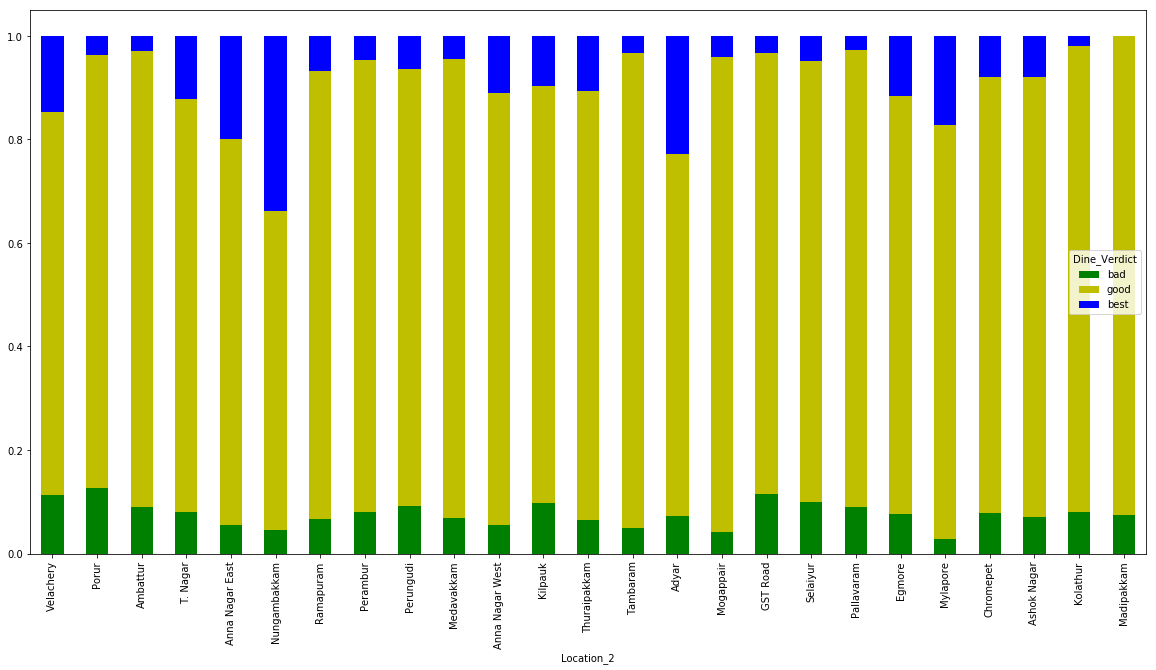

In [12]:
loc_price2 = pd.crosstab(df['Location_2'],df['Dine_Verdict'],margins=True,margins_name='Total') 
loc_price3 = loc_price2.sort_values('Total',ascending=False)[1:26]
loc_price3.drop(columns=['Total'],inplace=True)
loc_price3.div(loc_price3.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,figsize=(20, 10),color = ['g','y','b','r'])

### - Nungabakkam, Adyar, Anna Nagar East and Mylapore have the highest percentage of restaurants rated > 4 by Zomato's dining ratings

## Delivery only Ratings

In [13]:
bins_r = [0,3.5,4,5]
group_r = ['bad','good','best']
df['Delivery Rating'] = df['Delivery Rating'].astype(float)
df['Delivery_Verdict'] = pd.cut(df['Delivery Rating'],bins_r,labels=group_r)
yv = df['Delivery_Verdict'].value_counts().tolist()
colors = ['blue','green','red']
fig = go.Figure(data=[go.Bar(x=group_r,y=yv,marker_color=colors)])
fig.show()

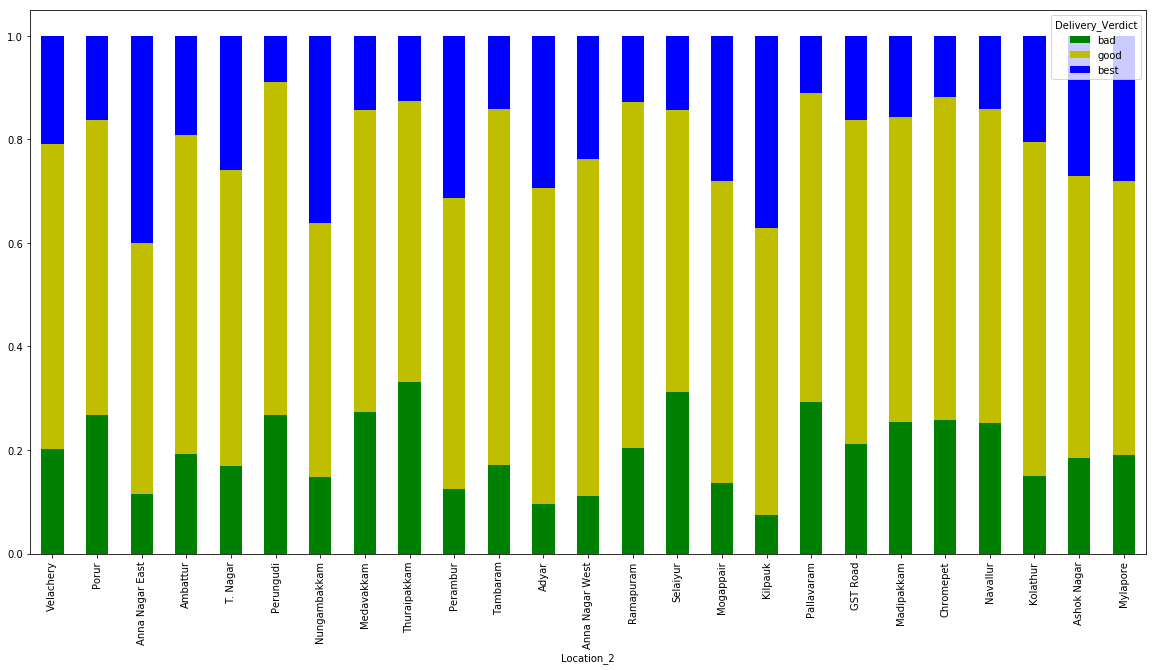

In [14]:
loc_price4 = pd.crosstab(df['Location_2'],df['Delivery_Verdict'],margins=True,margins_name='Total') 
loc_price5 = loc_price4.sort_values('Total',ascending=False)[1:26]
loc_price5.drop(columns=['Total'],inplace=True)
loc_price5.div(loc_price5.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,figsize=(20, 10),color = ['g','y','b','r'])

### - Anna Nagar East, Kilpauk, Nungabakkam, Mogappair & Adyar have the highest percentage of ratings > 4 as sourced from Zomato's delivery orders

<div id="price"></div>
# Price Comparision Location wise

In [15]:
bins = [0,500,1000,2500,float("inf")]
groups = ['cheap','moderate','pricey','expensive']
df['Cost'] = pd.cut(df['Price for 2'], bins,labels=groups)
yc = df['Cost'].value_counts().tolist()
colors = ['green','orange','blue','red']
fig = go.Figure(data=[go.Bar(x=groups,y=yc,marker_color=colors)])
fig.show()

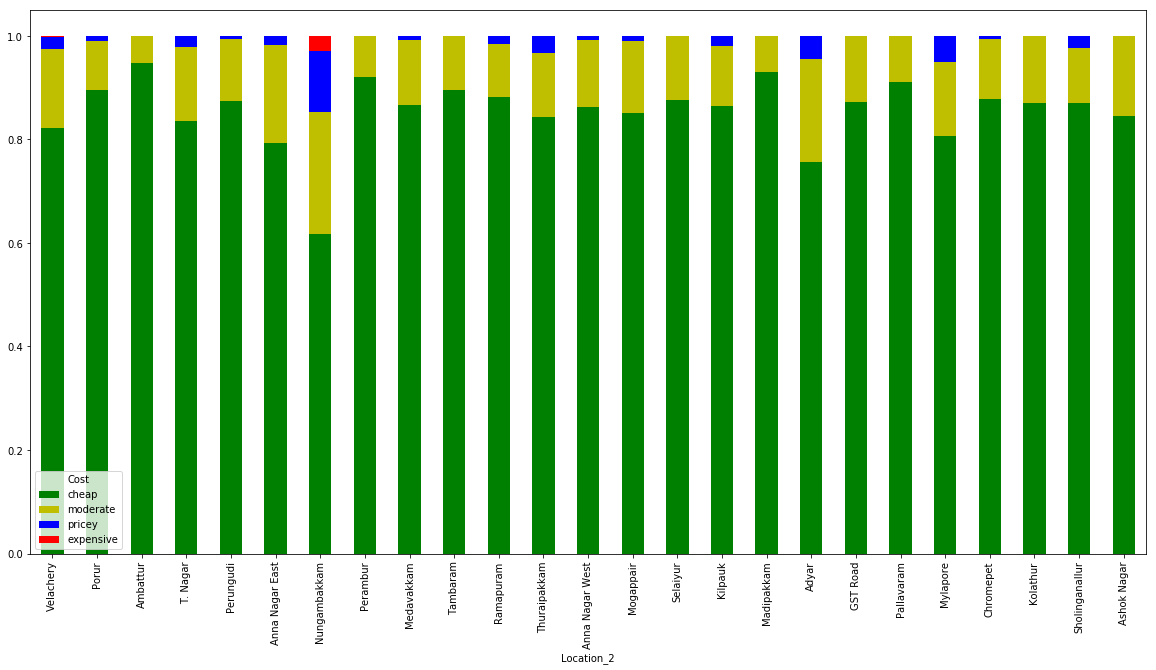

In [16]:
loc_price0 = pd.crosstab(df['Location_2'],df['Cost'],margins=True,margins_name='Total') 
loc_price1 = loc_price0.sort_values('Total',ascending=False)[1:26]
loc_price1.drop(columns=['Total'],inplace=True)
loc_price1.div(loc_price1.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,figsize=(20, 10),color = ['g','y','b','r'])

### - As expected Nungambakkam has the most number of expensive restaurants

<div id="food"></div>
# What does Chennai eat?

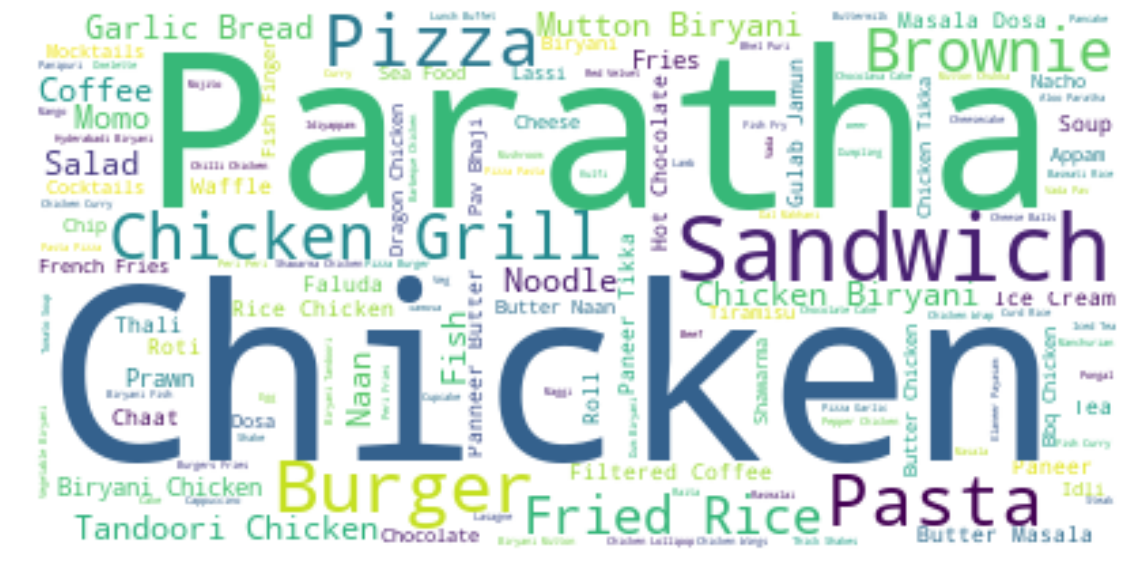

In [17]:
dishes = ' '.join(dish for dish_list in df['Top Dishes'].tolist() for dish in dish_list if dish != np.nan)
wordcloud = WordCloud(background_color='white',stopwords=['nan']).generate(dishes)
figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Clearly this breaks the stereotype of Chennai predominantly being a 'Idly Dosa' place and Chicken is hands-down the most eaten dish/food

## Most Popular Cuisines being served in Chennai restaurants

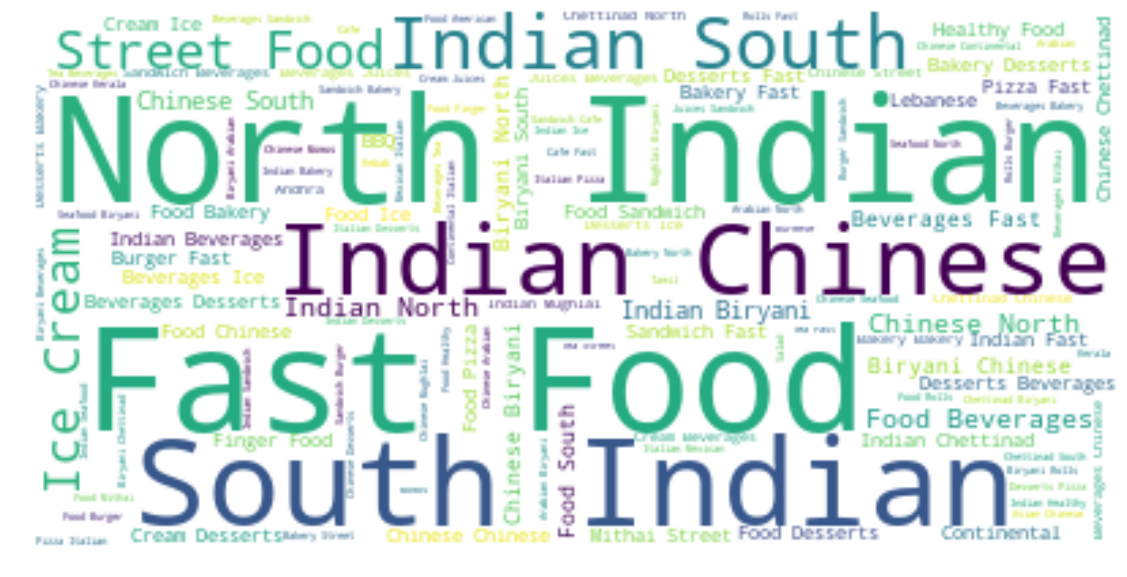

In [18]:
cuisines = ' '.join(dish for dish_list in df['Cuisine'].tolist() for dish in dish_list if dish != 'Invalid')
wordcloud = WordCloud(background_color='white').generate(cuisines)
figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<div id="veg"></div>
# Chennai and Vegetarianism - Myths debunked

In [19]:
def veg_status(feat_list):
    if 'Vegetarian Only' in feat_list:
        return 'Yes'
    elif ' Vegetarian Only' in feat_list:
        return 'Yes'
    else:
        return 'No'

In [20]:
df['Vegetarian Status'] = df['Features'].apply(lambda x: veg_status(x))
df['Vegetarian Status'].value_counts()

No     10202
Yes     1830
Name: Vegetarian Status, dtype: int64

### Only 1830 restaurants listed on Zomato have declared themselves 'Vegetarian Only' which means only about 15% of them are classified Vegetarian which debunks the myth that Chennai is a 'Vegetarian' majority

## Dominant Vegetarian Restaurant Franchises

In [21]:
fig = go.Figure(data=[go.Bar(
                x = df.loc[df['Vegetarian Status'] == 'Yes']['name of restaurant'].value_counts()[:10].index.tolist(),
                y = df.loc[df['Vegetarian Status'] == 'Yes']['name of restaurant'].value_counts()[:10].values.tolist())])

fig.show()

## Locations with Maximum Vegetarian Restaurants

In [22]:
fig = go.Figure(data=[go.Bar(
                x = df.loc[df['Vegetarian Status'] == 'Yes']['Location'].value_counts()[:10].index.tolist(),
                y = df.loc[df['Vegetarian Status'] == 'Yes']['Location'].value_counts()[:10].values.tolist())])

fig.show()

<div id="pop"></div>
# Most Popular Restaurants in Chennai

In [23]:
df.loc[df['Dining Rating Count'].nlargest(10).index][['Name of Restaurant','Location_2','Dining Rating Count','Delivery Rating Count']]

,Name of Restaurant,Location_2,Dining Rating Count,Delivery Rating Count
89,Coal Barbecues,Velachery,9410.0,NaN
9233,Barbeque Nation,T. Nagar,5821.0,NaN
74,Onesta,Semmancheri,5407.0,4375.0
9030,Paradise Biryani,Perungudi,5317.0,18200.0
9026,Copper Kitchen,Porur,5073.0,26800.0
9038,Palmshore,Ramapuram,4805.0,17300.0
9040,Palmshore,Ashok Nagar,4478.0,19800.0
8757,Yaa Mohaideen Biryani,Pallavaram,3414.0,NaN
1,Sukkubhai Biriyani,Alandur,3059.0,39200.0
9039,Palmshore,Santhome,3056.0,11100.0


### - Coal Barbeques, BBQ Nation and Onesta are the top 3 most popular restaurants as per the number of Zomato Dining Ratings

In [24]:
df.loc[df['Delivery Rating Count'].nlargest(10).index][['Name of Restaurant','Location_2','Delivery Rating Count','Dining Rating Count']]

,Name of Restaurant,Location_2,Delivery Rating Count,Dining Rating Count
55,Guntur Gongura,Sholinganallur,59900.0,2449.0
251,Hotelkaar Biriyani,T. Nagar,51700.0,1078.0
22,Supriya Andhra Restaurant,Thuraipakkam,50100.0,1992.0
232,Sapthagiri Tiffin Centre,T. Nagar,47200.0,1335.0
8822,Sangeetha Veg Restaurant,Thuraipakkam,45500.0,1565.0
9,Sangeetha Veg Restaurant,T. Nagar,39600.0,1578.0
1,Sukkubhai Biriyani,Alandur,39200.0,3059.0
40,Krishna's Dosa Kadai,Mogappair,34600.0,692.0
493,Suryas Chettinad Multi Cuisine Restaurant,Sholinganallur,32600.0,349.0
8826,Sangeetha Veg Restaurant,Velachery,28800.0,1159.0


### - Guntur Gongura, Hotelkaar Biriyani and Supriya Andhra Restaurants are the top 3 most popular delivery focussed restaurants as per the number of Zomato Delivery Ratings

## Don't forget to upvote this Kernel and the Dataset :)